# Classifying Breast Cancer
## Breast Cancer Wisconsin (Diagnostic) Data Set

From: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

References:
- [Diagnosing breast cancer with AI // Coding for Medicine #3](https://www.youtube.com/watch?v=c8s5GKRrenY&t=1482s)
- [A Gentle Introduction to tidymodels](https://rviews.rstudio.com/2019/06/19/a-gentle-intro-to-tidymodels/)'
- [Blog Post 4 - An Introduction To Tidymodels](https://rstudio-pubs-static.s3.amazonaws.com/606415_29e3fe510fd94f9da60b19e2abf07397.html)

In [1]:
library(tidymodels)
library(repr)

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

-- Attaching packages ------------------------------------------------------------------------------ tidymodels 0.1.3 --

v broom        0.7.6      v recipes      0.1.16
v dials        0.0.9      v rsample      0.1.0 
v dplyr        1.0.6      v tibble       3.1.2 
v ggplot2      3.3.3      v tidyr        1.1.3 
v infer        0.5.4      v tune         0.1.5 
v modeldata    0.1.0      v workflows    0.2.2 
v parsnip      0.1.6      v workflowsets 0.0.2 
v purrr        0.3.4      v yardstick    0.0.8 

-- Conflicts --------------------------------------------------------------------------------- tidymodels_conflicts() --
x purrr::discard() masks scales::discard()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x recipes::step()  masks stats::step()
* Use tidymodels_prefer() to resolve common conflicts.



In [2]:
data <- readr::read_csv("wisconsin-cancer-data.csv")

head(data)

Warning message:
"Missing column names filled in: 'X33' [33]"

-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  diagnosis = col_character(),
  X33 = col_character()
)
i Use `spec()` for the full column specifications.


Warning message:
"569 parsing failures.
row col   expected     actual                        file
  1  -- 33 columns 32 columns 'wisconsin-cancer-data.csv'
  2  -- 33 columns 32 columns 'wisconsin-cancer-data.csv'
  3  -- 33 columns 32 columns 'wisconsin-cancer-data.csv'
  4  -- 33 columns 32 columns 'wisconsin-cancer-data.csv'
  5  -- 33 columns 32 columns 'wisconsin-cancer-data.csv'
... ... .......... .......... ...........................
See problems(...) for more details.
"


id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,X33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


# Exploratory Data Analysis

In [3]:
str(data)

spec_tbl_df [569 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                     : num [1:569] 842302 842517 84300903 84348301 84358402 ...
 $ diagnosis              : chr [1:569] "M" "M" "M" "M" ...
 $ radius_mean            : num [1:569] 18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num [1:569] 10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num [1:569] 122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num [1:569] 1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num [1:569] 0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num [1:569] 0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num [1:569] 0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave points_mean    : num [1:569] 0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num [1:569] 0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num [1:569] 0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num [1:569] 1.095 0.543 

In [4]:
data_long <- data %>%
    select(-X33) %>%
    gather(variable, measurement, radius_mean:fractal_dimension_worst, factor_key=TRUE)

head(data_long)

id,diagnosis,variable,measurement
<dbl>,<chr>,<fct>,<dbl>
842302,M,radius_mean,17.99
842517,M,radius_mean,20.57
84300903,M,radius_mean,19.69
84348301,M,radius_mean,11.42
84358402,M,radius_mean,20.29
843786,M,radius_mean,12.45


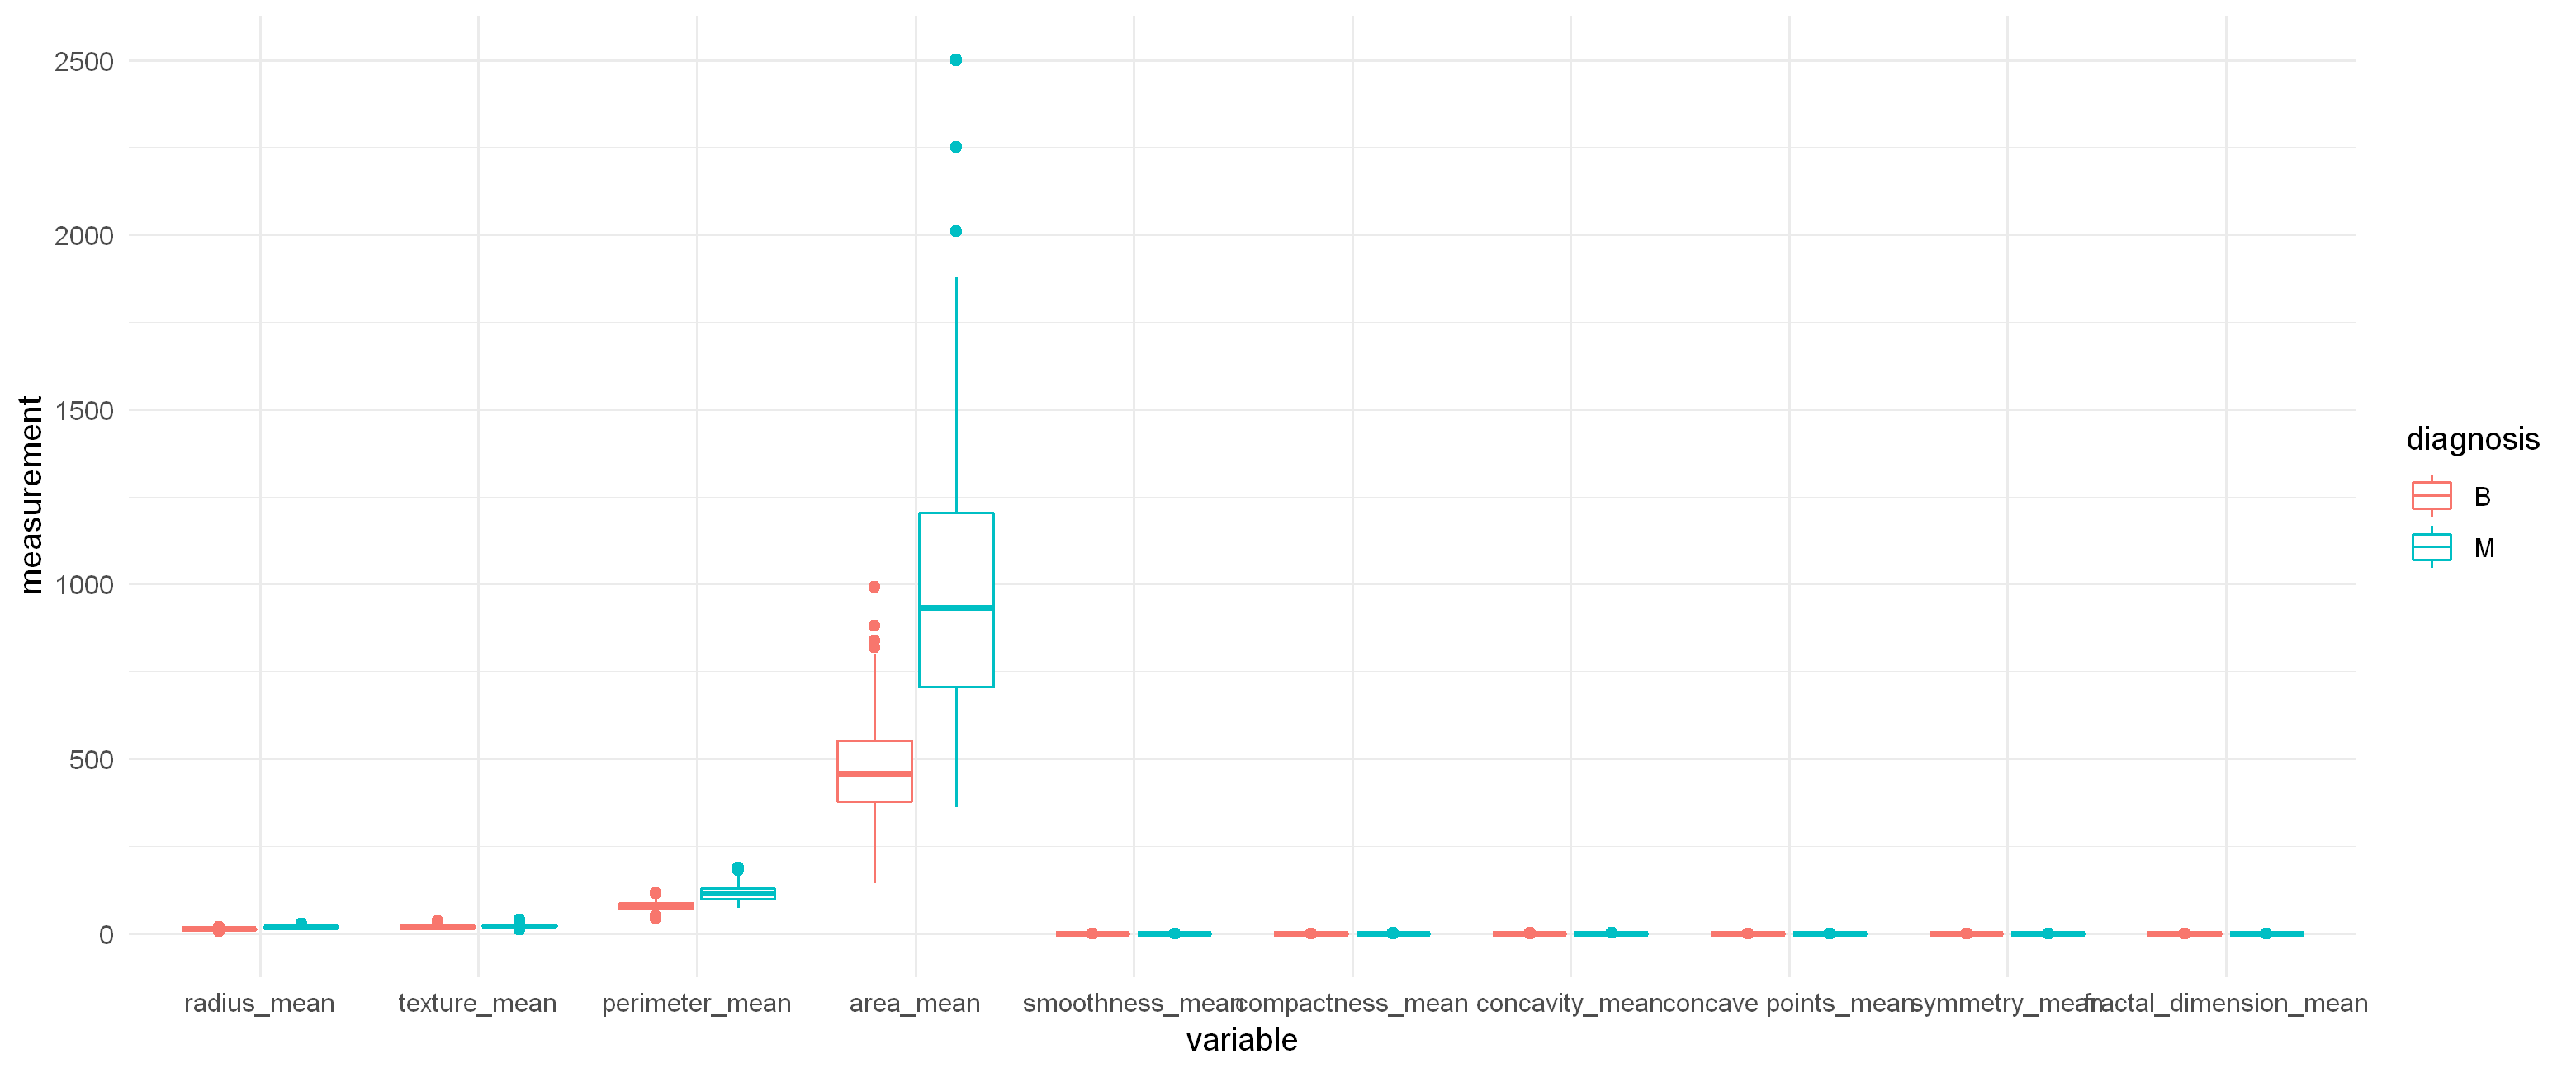

In [5]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res=260)

data_mean <- data_long %>% filter(grepl('_mean', variable))

ggplot(data_mean, aes(x = variable, y = measurement, color = diagnosis)) + 
    geom_boxplot() + 
    theme_minimal()

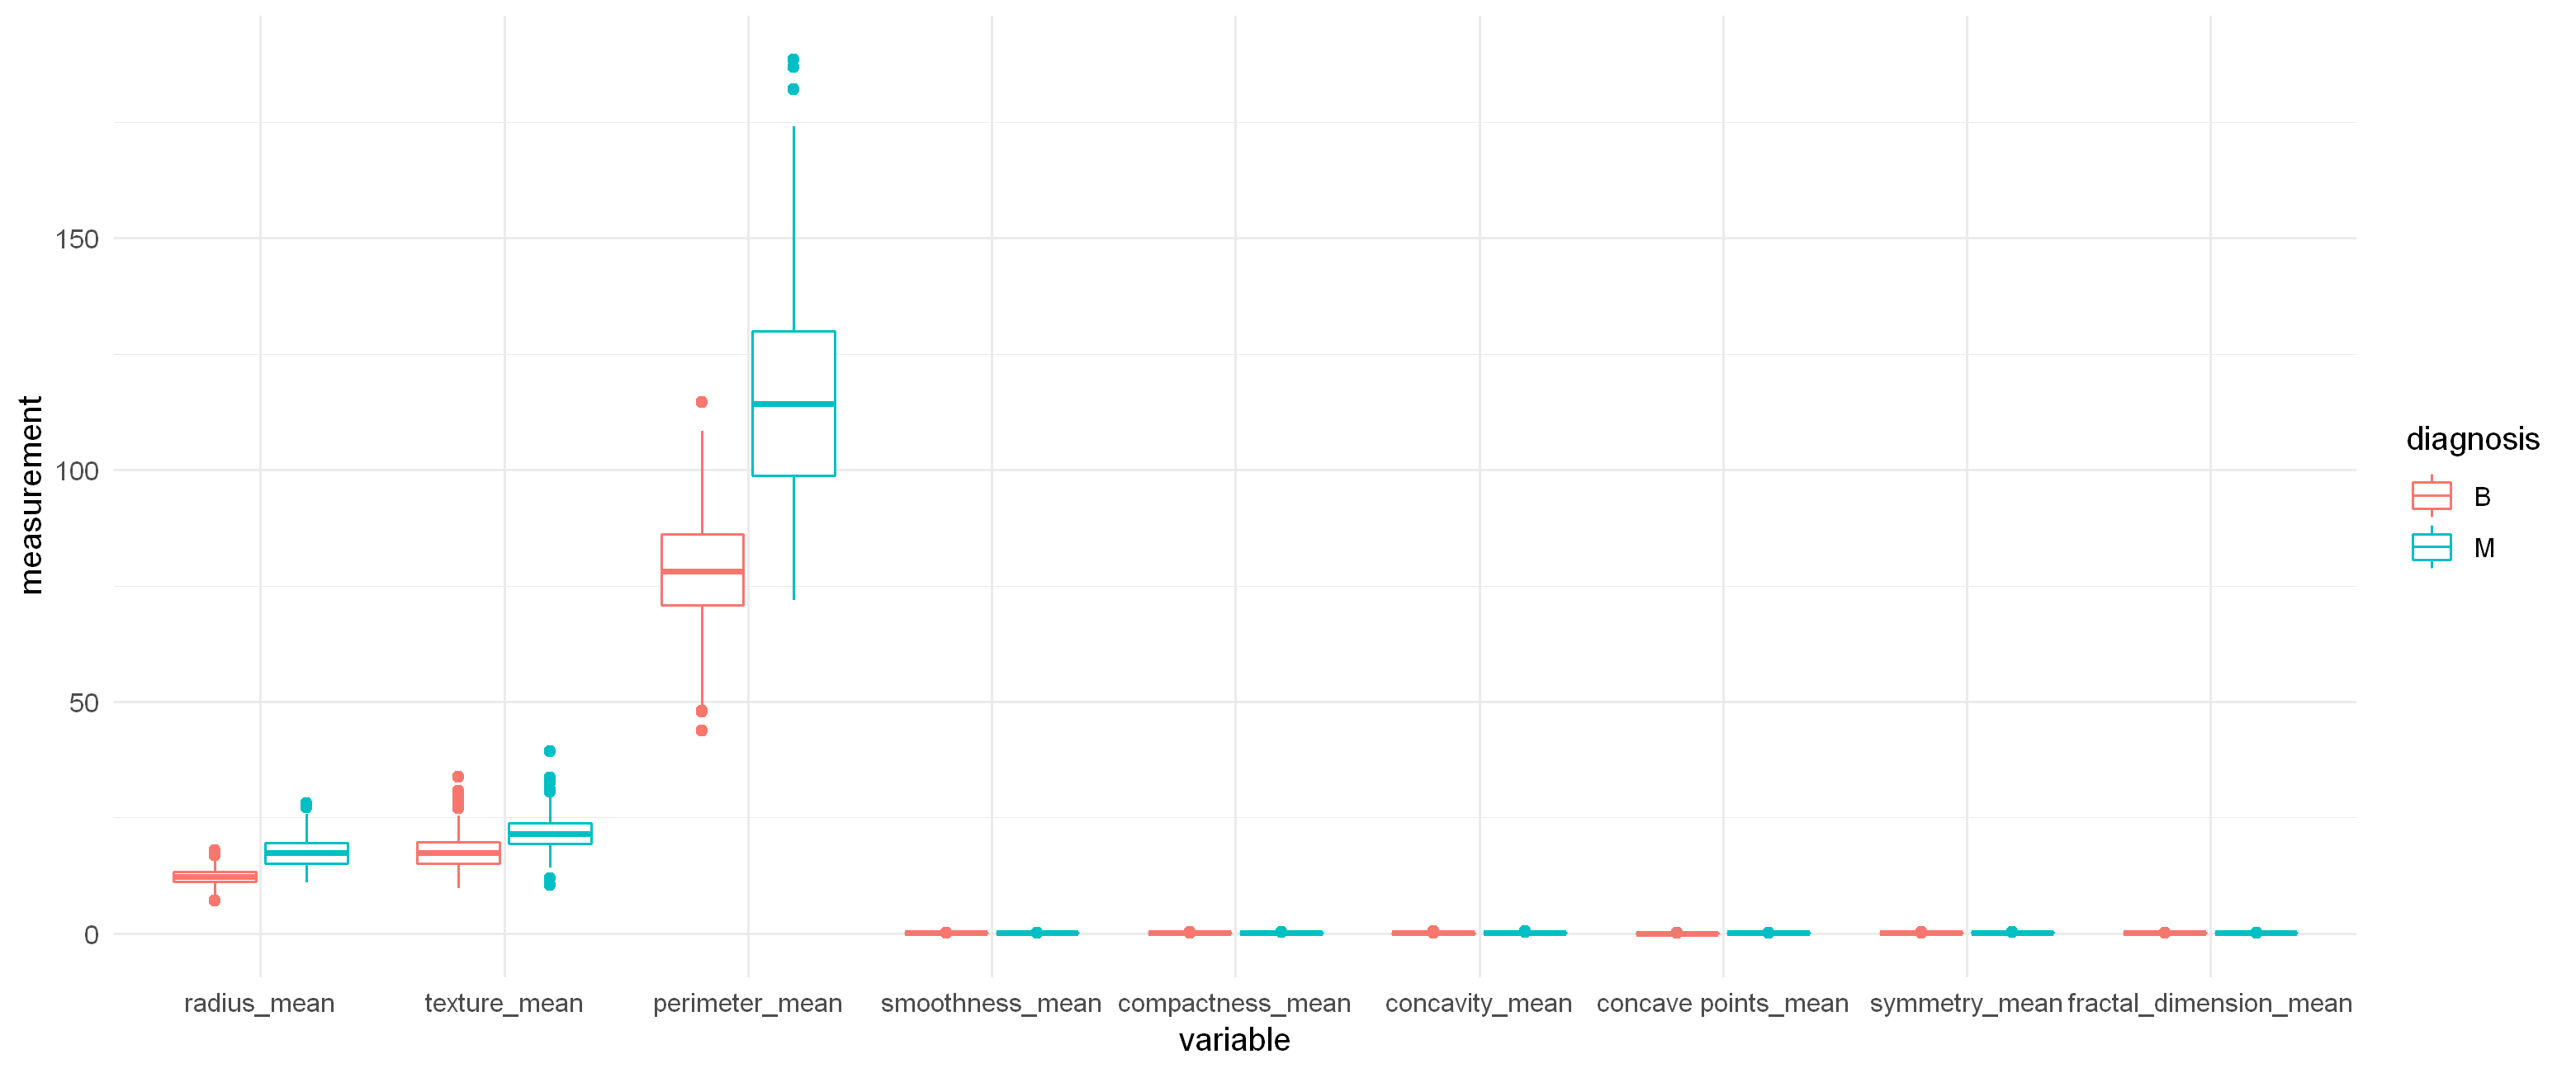

In [6]:
ggplot(data_mean %>% filter(variable != "area_mean"), aes(x = variable, y = measurement, color = diagnosis)) + 
    geom_boxplot() + 
    theme_minimal()

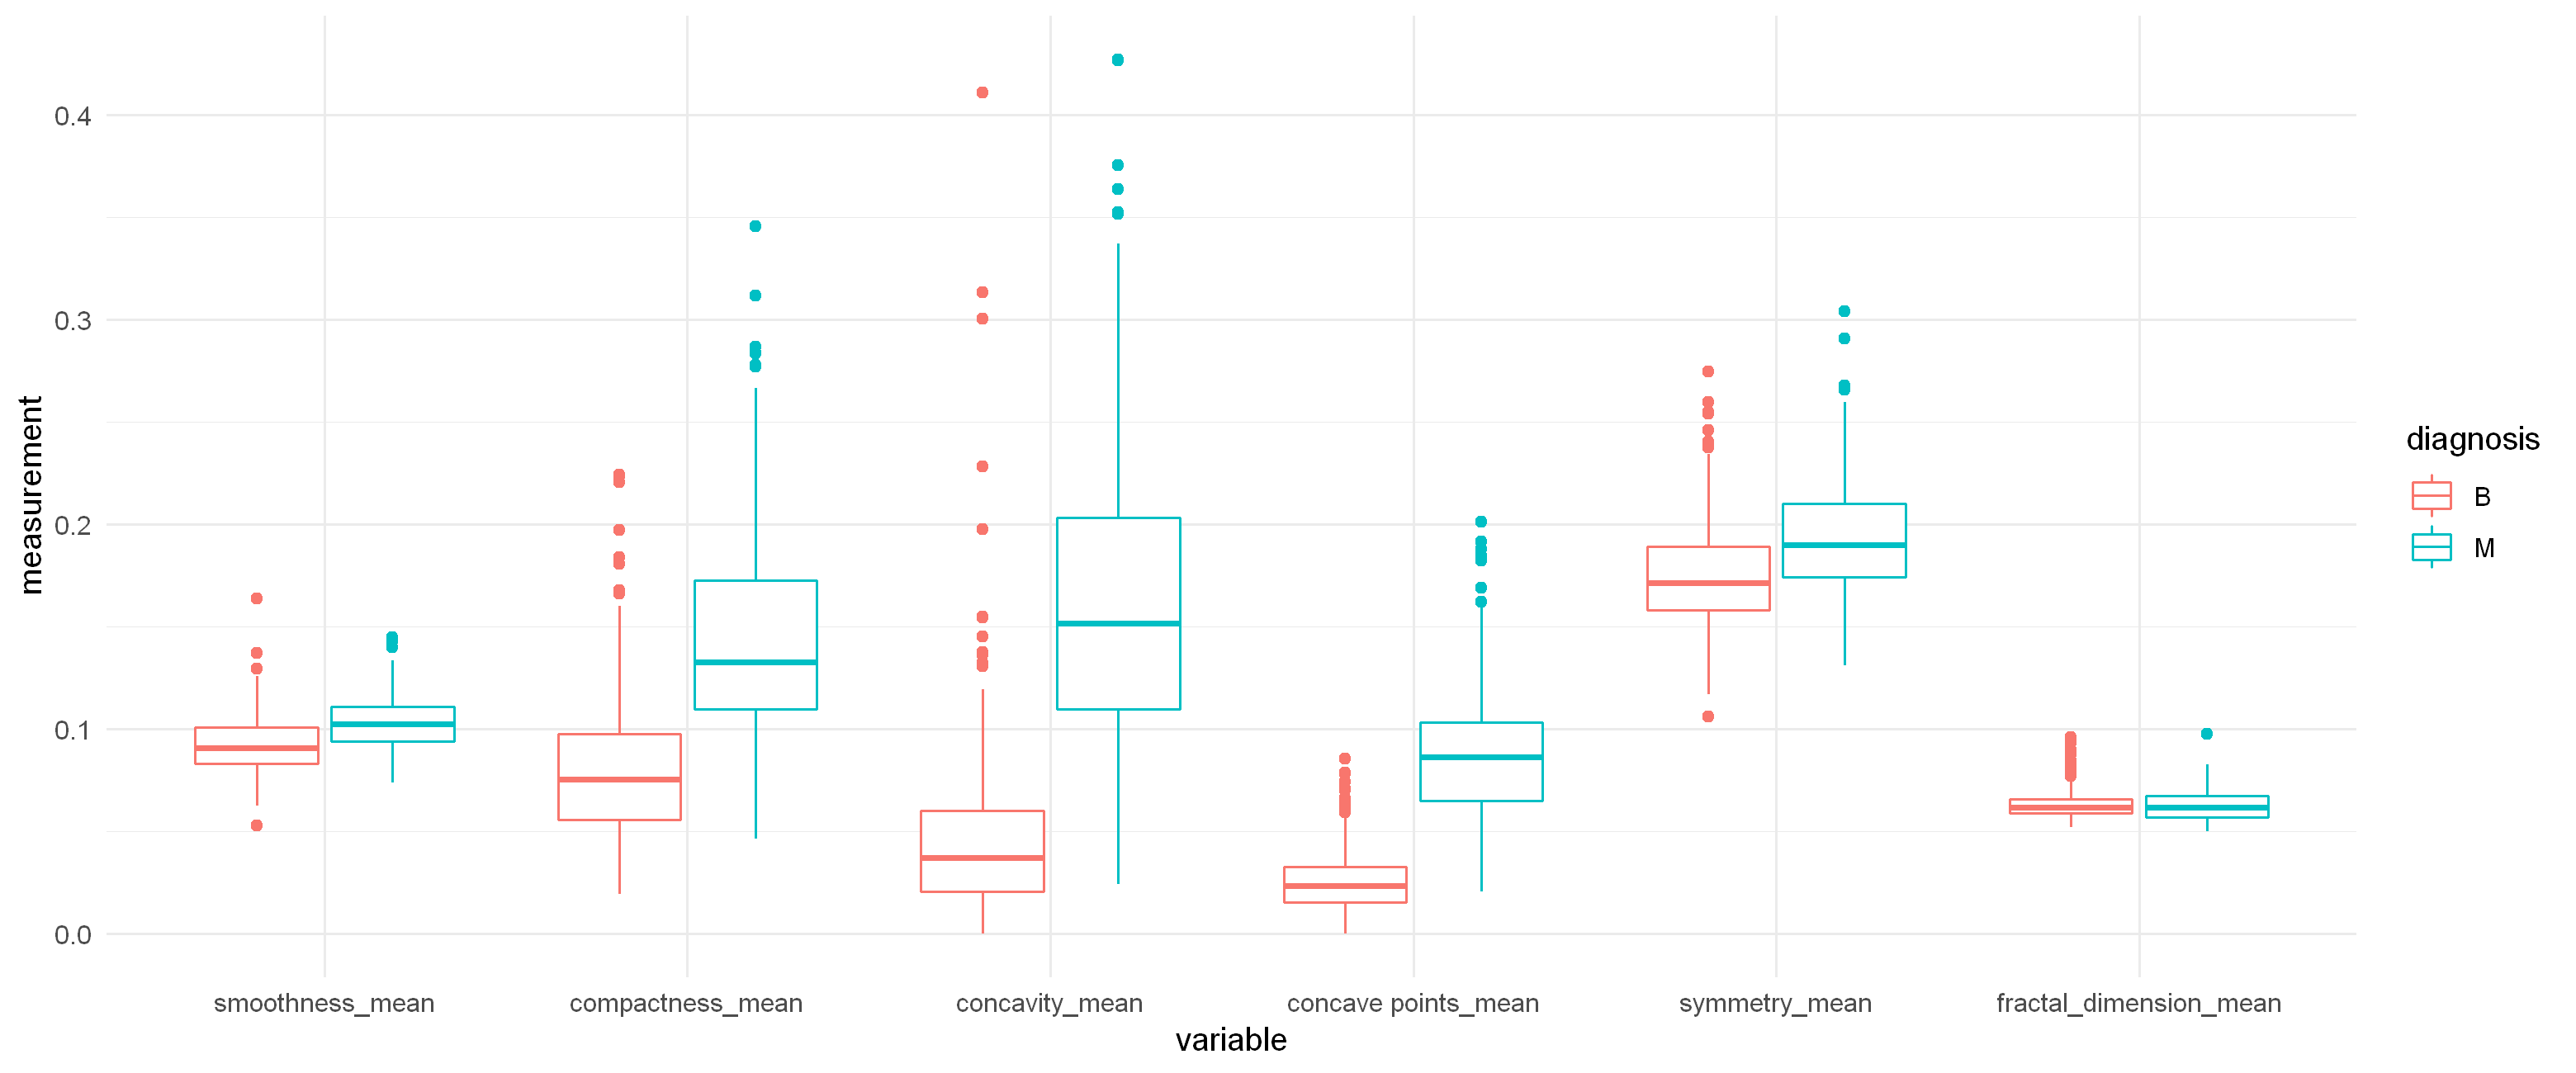

In [7]:
data_mean_filtered <- data_mean %>% 
    filter(!variable %in% c("area_mean", "perimeter_mean", "radius_mean", "texture_mean")) 

ggplot(data_mean_filtered, aes(x = variable, y = measurement, color = diagnosis)) + 
    geom_boxplot() + 
    theme_minimal()

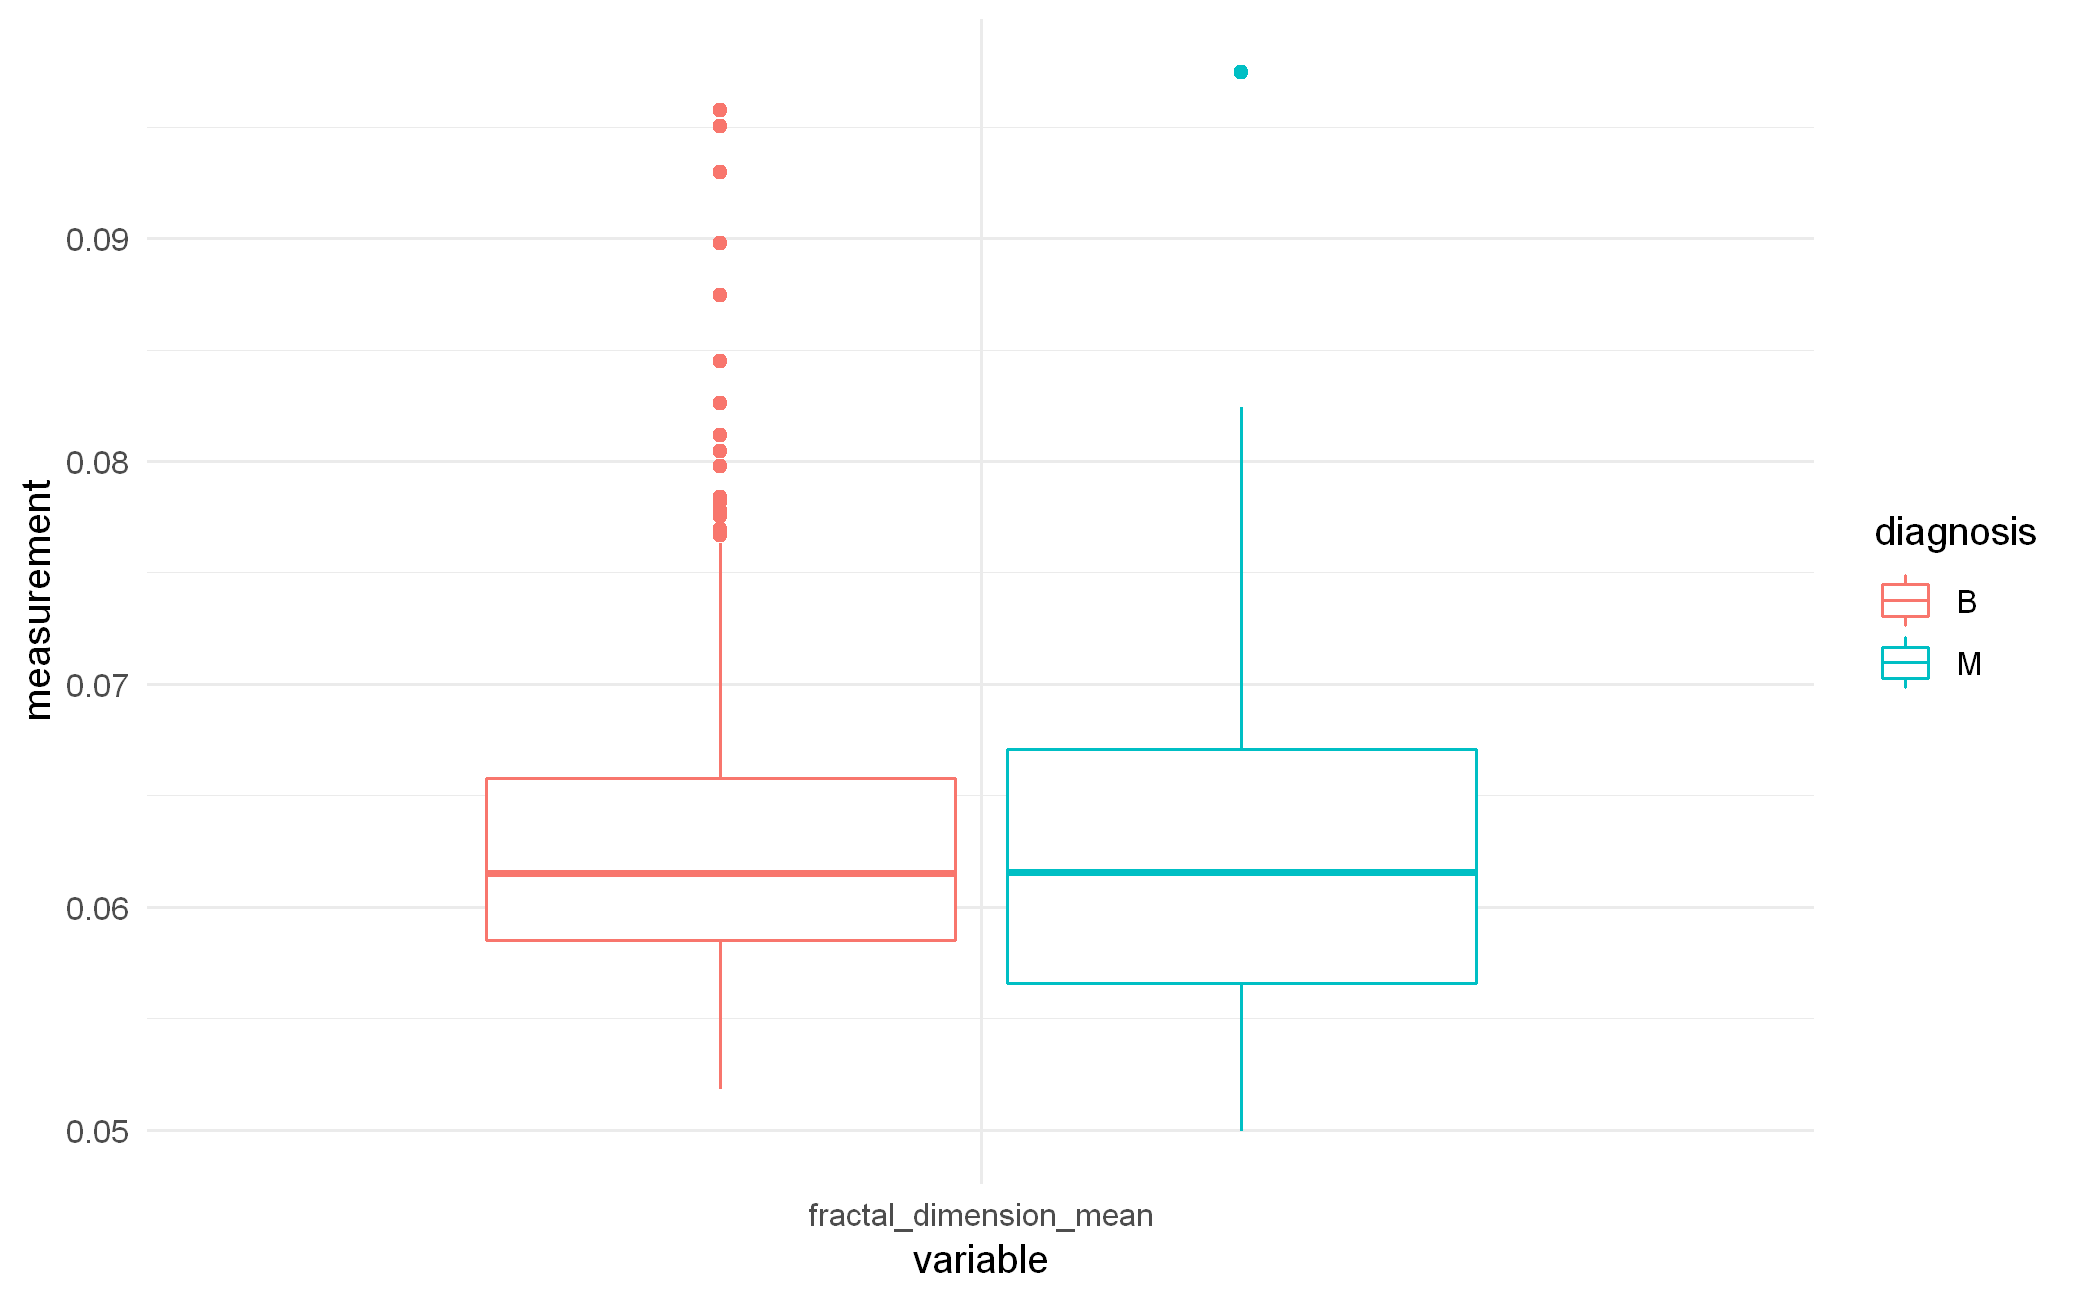

In [8]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res=260)

data_long %>% 
    filter(variable == "fractal_dimension_mean") %>%
    ggplot(aes(x = variable, y = measurement, color = diagnosis)) + 
        geom_boxplot() + 
        theme_minimal()

# Pre-Process

## Finding Variables with High Correlations to Diagnosis

In [9]:
corr_data <- data %>%
    mutate(diagnosis = ifelse(diagnosis == "M", 1, 0))

mean_corr <- corr_data %>%
    select(diagnosis, radius_mean:fractal_dimension_mean) %>%
    cor()

print(mean_corr[1,])

             diagnosis            radius_mean           texture_mean 
             1.0000000              0.7300285              0.4151853 
        perimeter_mean              area_mean        smoothness_mean 
             0.7426355              0.7089838              0.3585600 
      compactness_mean         concavity_mean    concave points_mean 
             0.5965337              0.6963597              0.7766138 
         symmetry_mean fractal_dimension_mean 
             0.3304986             -0.0128376 


In [10]:
se_corr <- corr_data %>%
    select(diagnosis, radius_se:fractal_dimension_se) %>%
    cor()

print(se_corr[1,])

           diagnosis            radius_se           texture_se 
         1.000000000          0.567133821         -0.008303333 
        perimeter_se              area_se        smoothness_se 
         0.556140703          0.548235940         -0.067016011 
      compactness_se         concavity_se    concave points_se 
         0.292999244          0.253729766          0.408042333 
         symmetry_se fractal_dimension_se 
        -0.006521756          0.077972417 


In [11]:
worst_corr <- corr_data %>%
    select(diagnosis, radius_worst:fractal_dimension_worst) %>%
    cor()

print(worst_corr[1,])

              diagnosis            radius_worst           texture_worst 
              1.0000000               0.7764538               0.4569028 
        perimeter_worst              area_worst        smoothness_worst 
              0.7829141               0.7338250               0.4214649 
      compactness_worst         concavity_worst    concave points_worst 
              0.5909982               0.6596102               0.7935660 
         symmetry_worst fractal_dimension_worst 
              0.4162943               0.3238722 


In [12]:
# selecting vars with high correlation
data_model <- data %>%
    select(diagnosis, radius_mean, perimeter_mean, area_mean, "concave points_mean", radius_worst, perimeter_worst,
           area_worst, "concave points_worst")

In [13]:
data_split <- initial_split(data_model)

In [14]:
data_split %>% training() %>% glimpse()

Rows: 426
Columns: 9
$ diagnosis              <chr> "B", "B", "M", "M", "B", "B", "B", "B", "B", "B~
$ radius_mean            <dbl> 11.040, 12.220, 15.500, 18.220, 13.620, 9.742, ~
$ perimeter_mean         <dbl> 70.67, 79.47, 102.90, 118.70, 87.19, 61.93, 66.~
$ area_mean              <dbl> 372.7, 453.1, 803.1, 1027.0, 573.2, 289.7, 334.~
$ `concave points_mean`  <dbl> 0.020740, 0.021660, 0.084810, 0.079500, 0.02443~
$ radius_worst           <dbl> 12.090, 13.160, 23.170, 21.840, 15.350, 11.210,~
$ perimeter_worst        <dbl> 79.73, 85.13, 157.10, 140.90, 97.58, 71.79, 70.~
$ area_worst             <dbl> 447.1, 515.3, 1748.0, 1485.0, 729.8, 380.9, 362~
$ `concave points_worst` <dbl> 0.06754, 0.08088, 0.21340, 0.17760, 0.07174, 0.~


In [15]:
model_recipe <- training(data_split) %>%
    recipe(diagnosis ~.) %>%
    step_corr(all_predictors()) %>%
    step_center(all_predictors(), -all_outcomes()) %>%
    step_scale(all_predictors(), -all_outcomes()) %>%
    prep()

model_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Training data contained 426 data points and no missing data.

Operations:

Correlation filter removed perimeter_mean, ... [trained]
Centering for area_worst, concave points_worst [trained]
Scaling for area_worst, concave points_worst [trained]

In [16]:
model_testing <- model_recipe %>%
    bake(testing(data_split)) 

glimpse(model_testing)

Rows: 143
Columns: 3
$ area_worst             <dbl> 1.8742194, 1.4379508, -0.2707385, 1.2560251, 0.~
$ `concave points_worst` <dbl> 1.06463494, 1.92205680, 0.88562932, 1.17294086,~
$ diagnosis              <fct> M, M, M, M, M, M, M, M, M, B, M, M, B, B, M, B,~


In [17]:
model_training <- juice(model_recipe)

glimpse(model_training)

Rows: 426
Columns: 3
$ area_worst             <dbl> -0.7909049, -0.6704453, 1.5068354, 1.0423064, -~
$ `concave points_worst` <dbl> -0.7172983, -0.5166315, 1.4767991, 0.9382780, -~
$ diagnosis              <fct> B, B, M, M, B, B, B, B, B, B, M, M, B, M, M, B,~


# Model Training - Random Forest

In [18]:
model_rf <-  rand_forest(trees = 100, mode = "classification") %>%
    set_engine("randomForest") %>%
    fit(diagnosis ~ ., data = model_training)

In [19]:
model_rf %>%
    predict(model_testing) %>%
    bind_cols(model_testing) %>%
    glimpse()

Rows: 143
Columns: 4
$ .pred_class            <fct> M, M, M, M, M, M, M, M, B, B, B, M, B, B, M, B,~
$ area_worst             <dbl> 1.8742194, 1.4379508, -0.2707385, 1.2560251, 0.~
$ `concave points_worst` <dbl> 1.06463494, 1.92205680, 0.88562932, 1.17294086,~
$ diagnosis              <fct> M, M, M, M, M, M, M, M, M, B, M, M, B, B, M, B,~


# Model Validation - Random Forest

In [20]:
model_rf %>%
    predict(model_testing) %>%
    bind_cols(model_testing) %>%
    metrics(truth = diagnosis, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9510490
kap,binary,0.8938382


In [21]:
model_probf <- model_rf %>%
    predict(model_testing, type = "prob") %>%
    bind_cols(model_testing)

glimpse(model_probs)

Rows: 143
Columns: 5
$ .pred_B                <dbl> 0.00, 0.00, 0.08, 0.00, 0.42, 0.03, 0.00, 0.00,~
$ .pred_M                <dbl> 1.00, 1.00, 0.92, 1.00, 0.58, 0.97, 1.00, 1.00,~
$ area_worst             <dbl> 1.8742194, 1.4379508, -0.2707385, 1.2560251, 0.~
$ `concave points_worst` <dbl> 1.06463494, 1.92205680, 0.88562932, 1.17294086,~
$ diagnosis              <fct> M, M, M, M, M, M, M, M, M, B, M, M, B, B, M, B,~


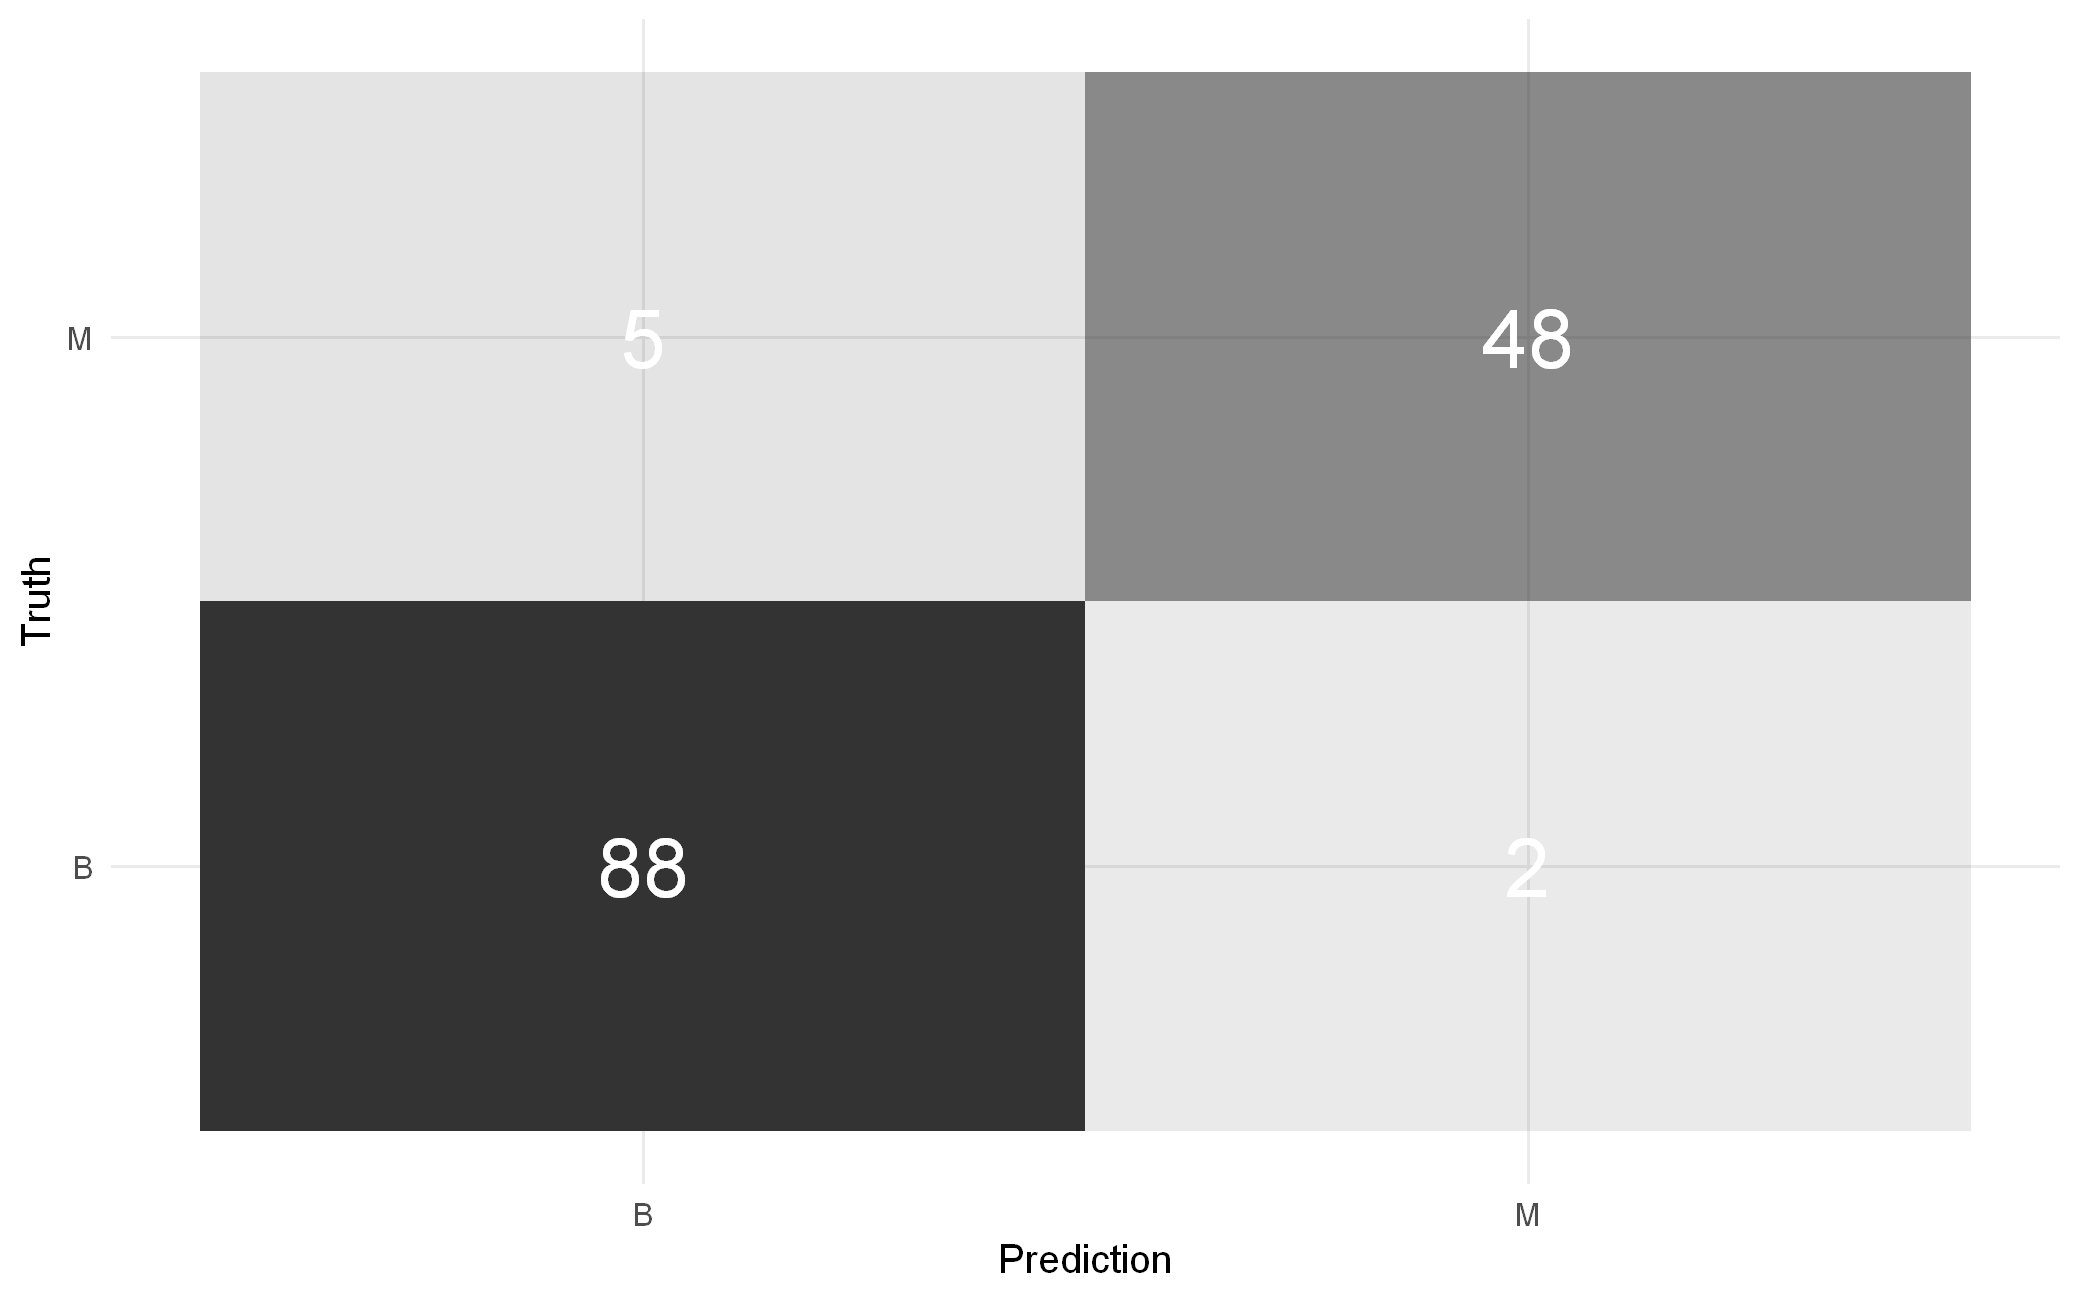

In [22]:
conf <- model_rf %>% 
    predict(model_testing) %>%
    bind_cols(model_testing %>% select(diagnosis)) %>%
    conf_mat(diagnosis, .pred_class)

conf %>%
    pluck(1) %>%
    as_tibble() %>%
    ggplot(aes(Prediction, Truth, alpha = n)) +
    geom_tile(show.legend = FALSE) +
    geom_text(aes(label = n), colour = "white", alpha = 1, size = 8) + 
    theme_minimal()

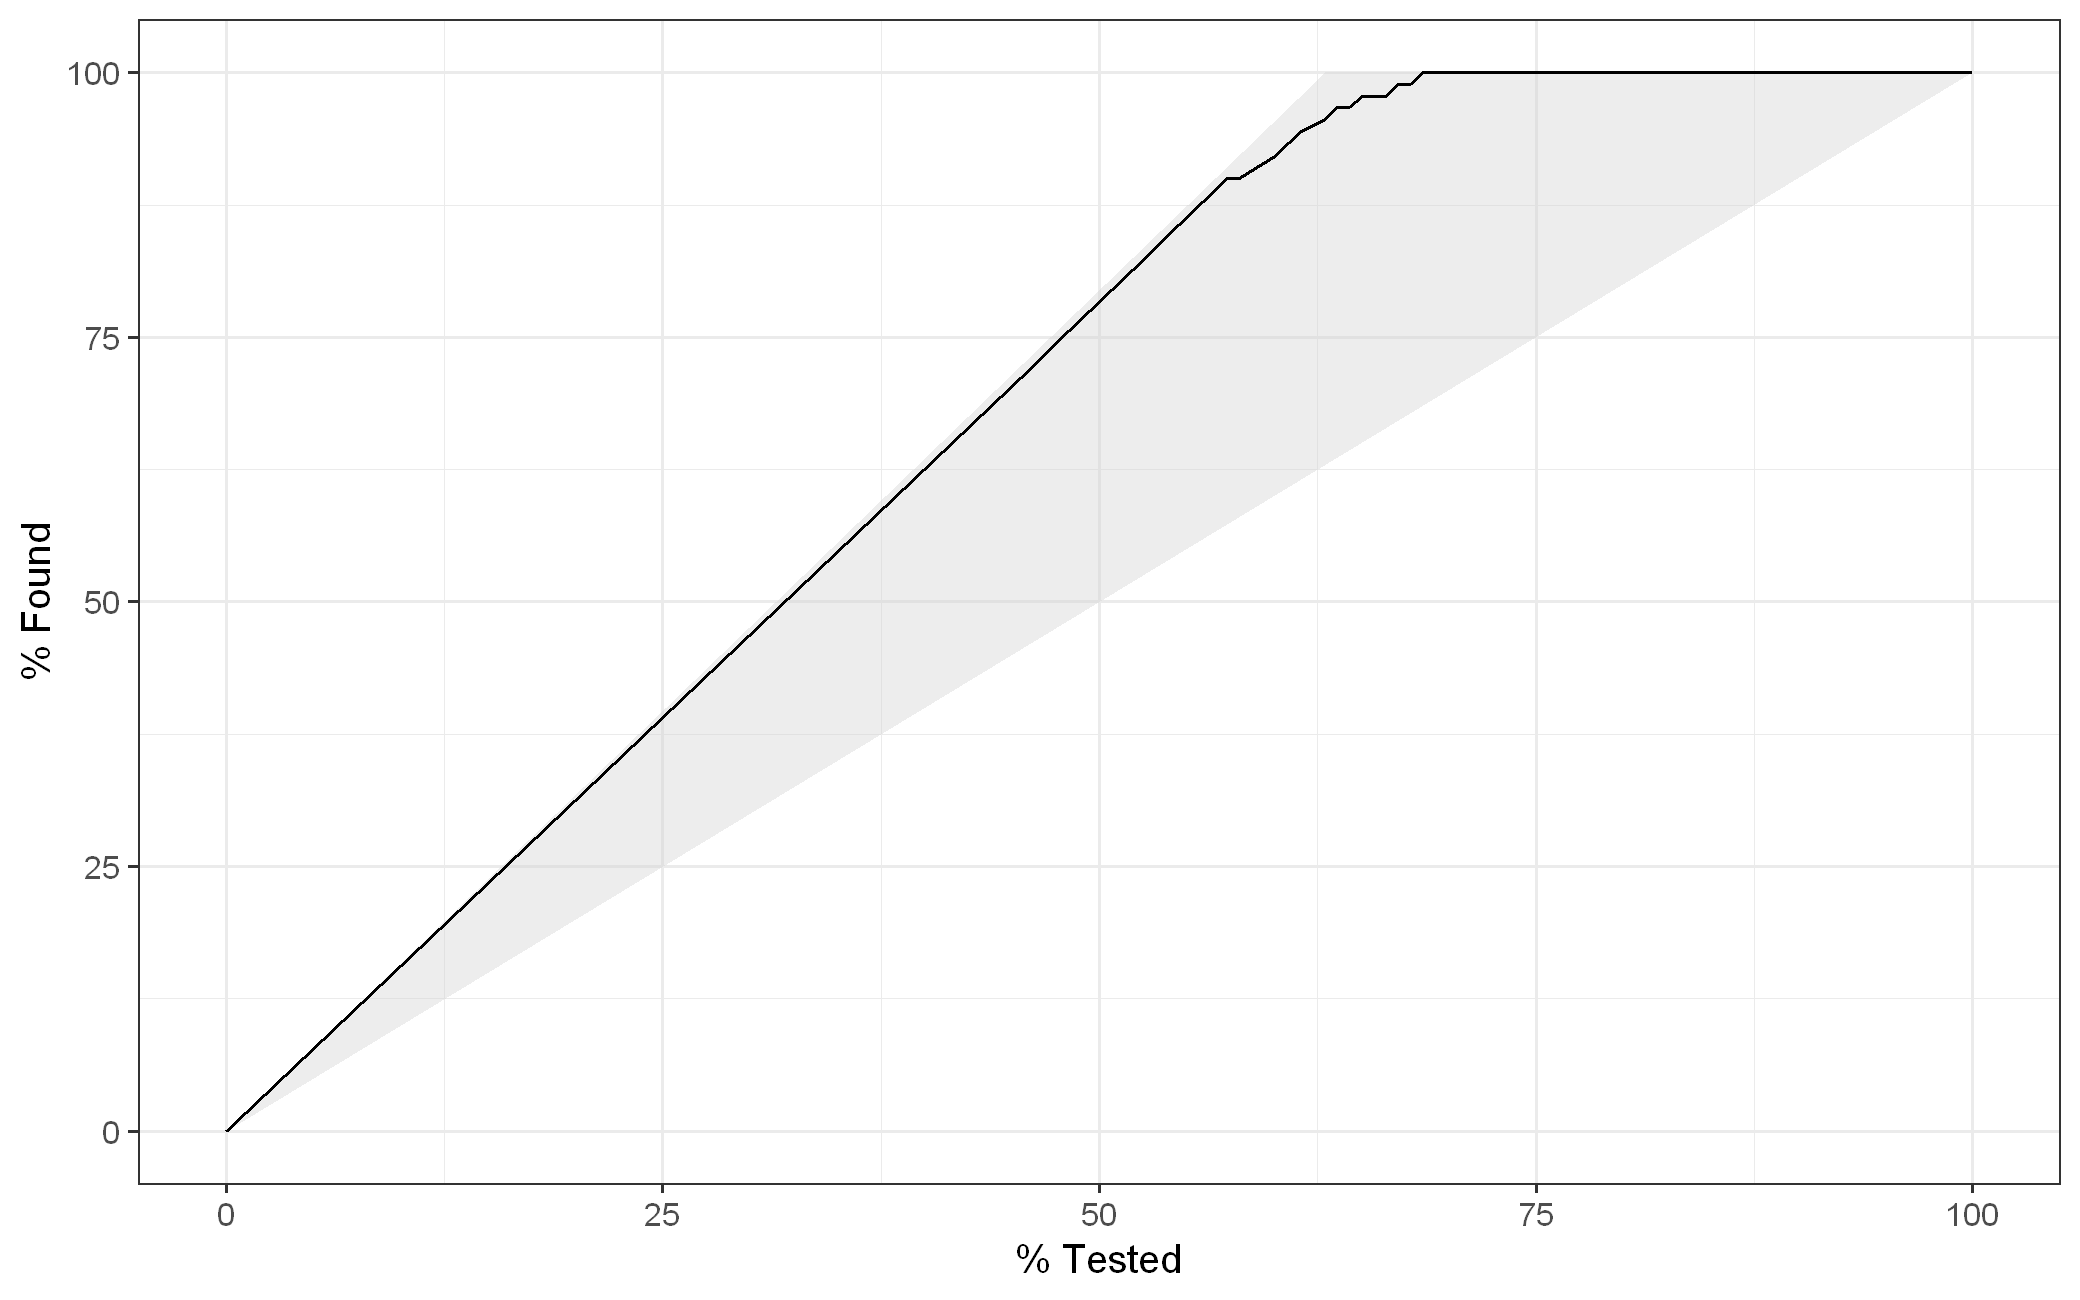

In [23]:
model_probs %>%
    gain_curve(diagnosis, .pred_B) %>%
    autoplot()

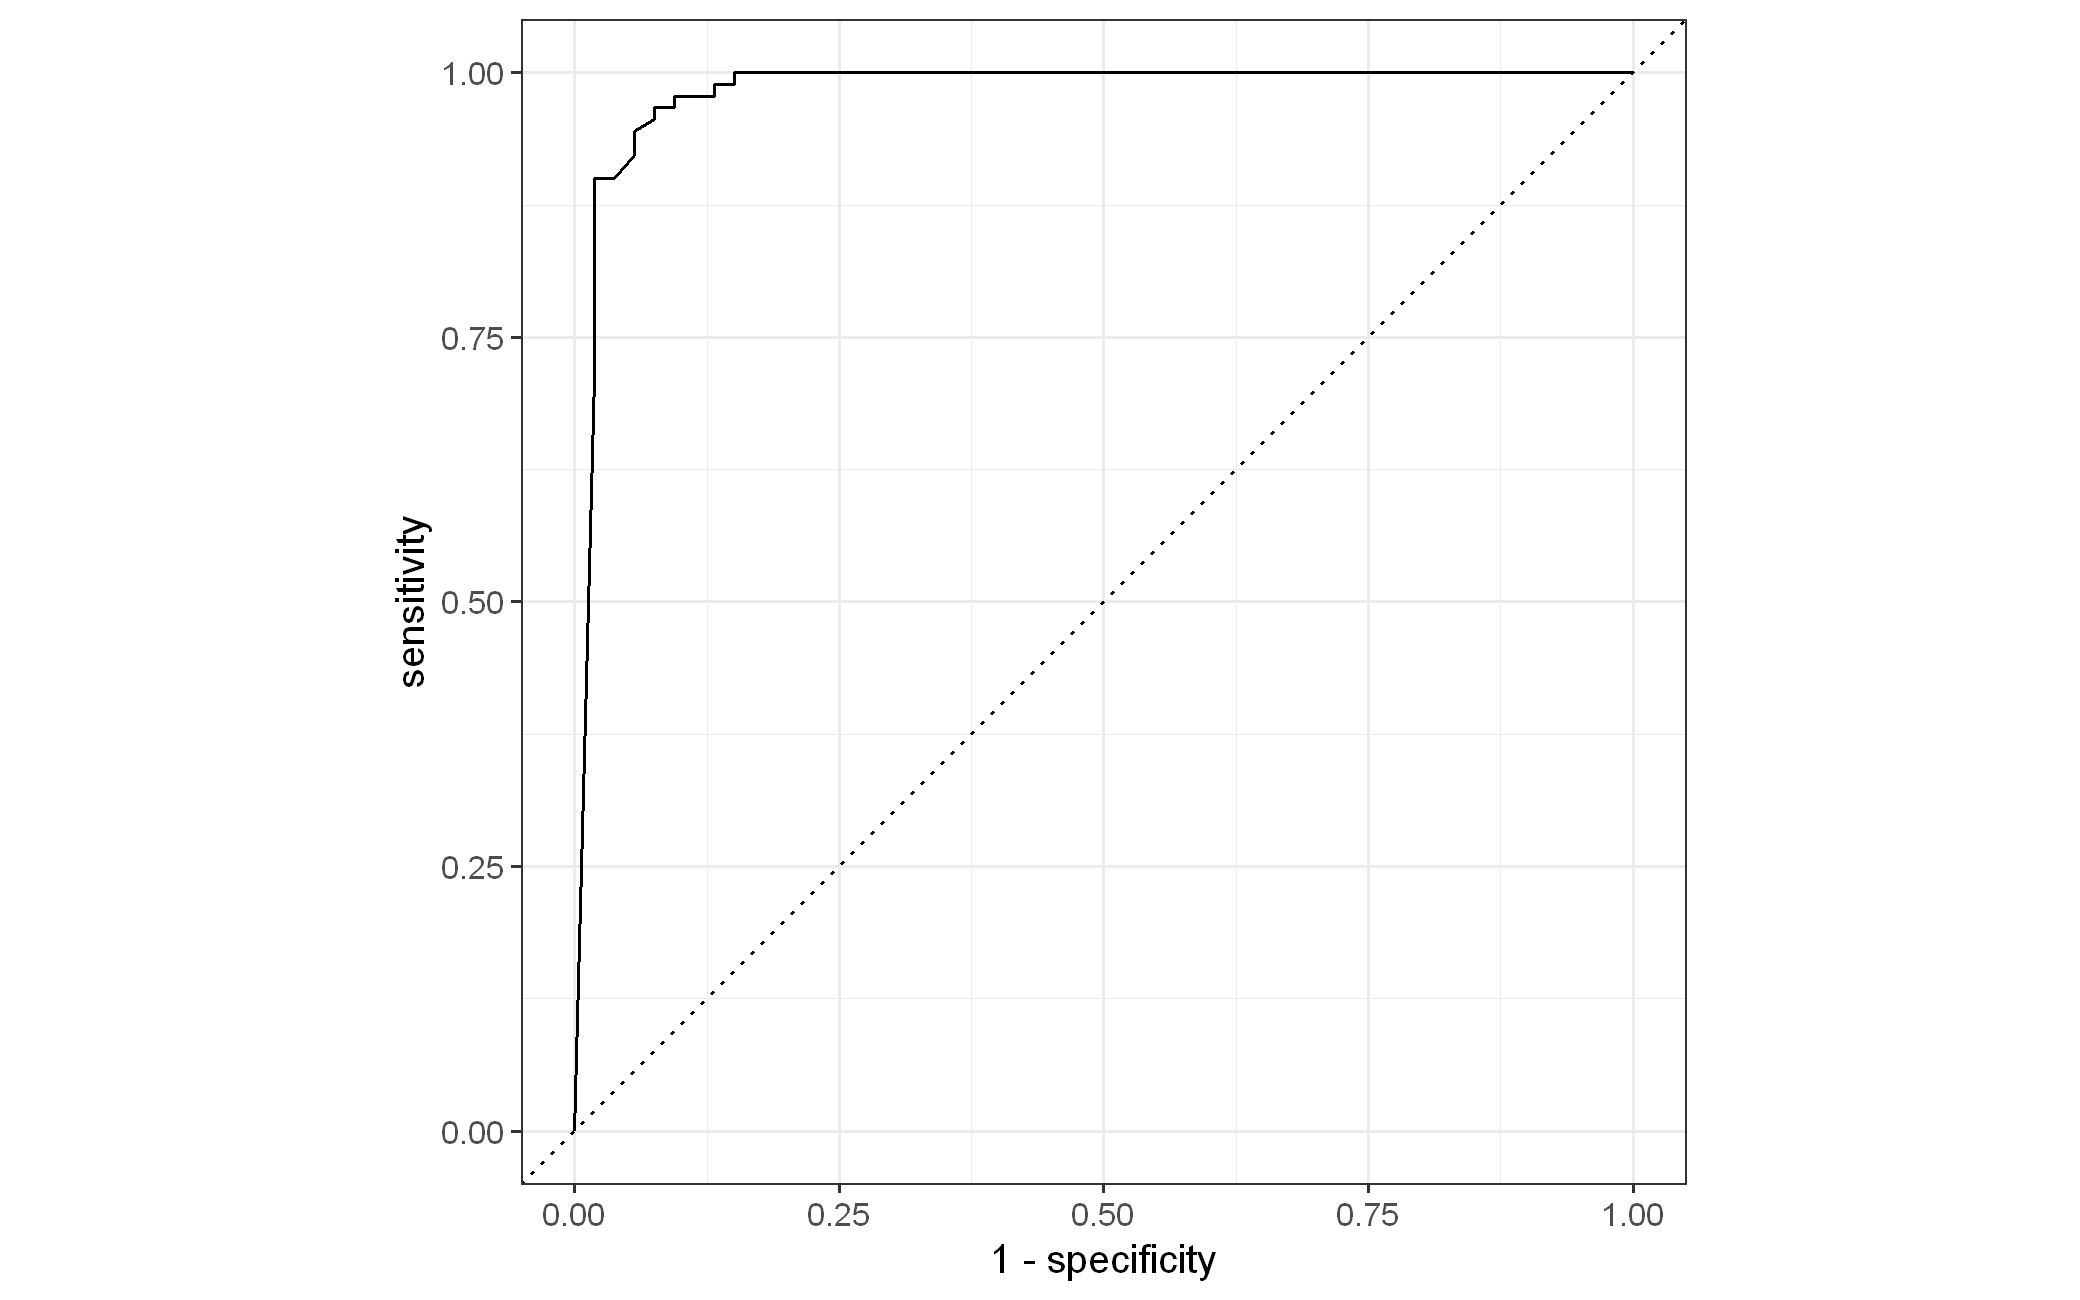

In [24]:
model_probs %>%
    roc_curve(diagnosis, .pred_B) %>%
    autoplot()

In [25]:
predict(model_rf, model_testing, type = "prob") %>%
    bind_cols(predict(model_rf, model_testing)) %>%
    bind_cols(select(model_testing, diagnosis)) %>%
    metrics(diagnosis, .pred_M, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.95104895
kap,binary,0.89383816
mn_log_loss,binary,24.83449646
roc_auc,binary,0.01834382


# Model Training - K-Nearest Neighbors

In [29]:
model_knn <-  nearest_neighbor(mode = "classification", 
                               neighbors = 5, 
                               weight_func = "gaussian", 
                               dist_power = 2) %>%
    set_engine("kknn") %>%
    fit(diagnosis ~ ., data = model_training)

In [31]:
model_knn %>%
    predict(model_testing) %>%
    bind_cols(model_testing) %>%
    glimpse()

Rows: 143
Columns: 4
$ .pred_class            <fct> M, M, M, M, M, M, M, M, B, B, B, M, B, B, M, B,~
$ area_worst             <dbl> 1.8742194, 1.4379508, -0.2707385, 1.2560251, 0.~
$ `concave points_worst` <dbl> 1.06463494, 1.92205680, 0.88562932, 1.17294086,~
$ diagnosis              <fct> M, M, M, M, M, M, M, M, M, B, M, M, B, B, M, B,~


# Model Validation - K-Nearest Neighbors

In [33]:
model_knn %>%
    predict(model_testing) %>%
    bind_cols(model_testing) %>%
    metrics(truth = diagnosis, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9370629
kap,binary,0.8635062


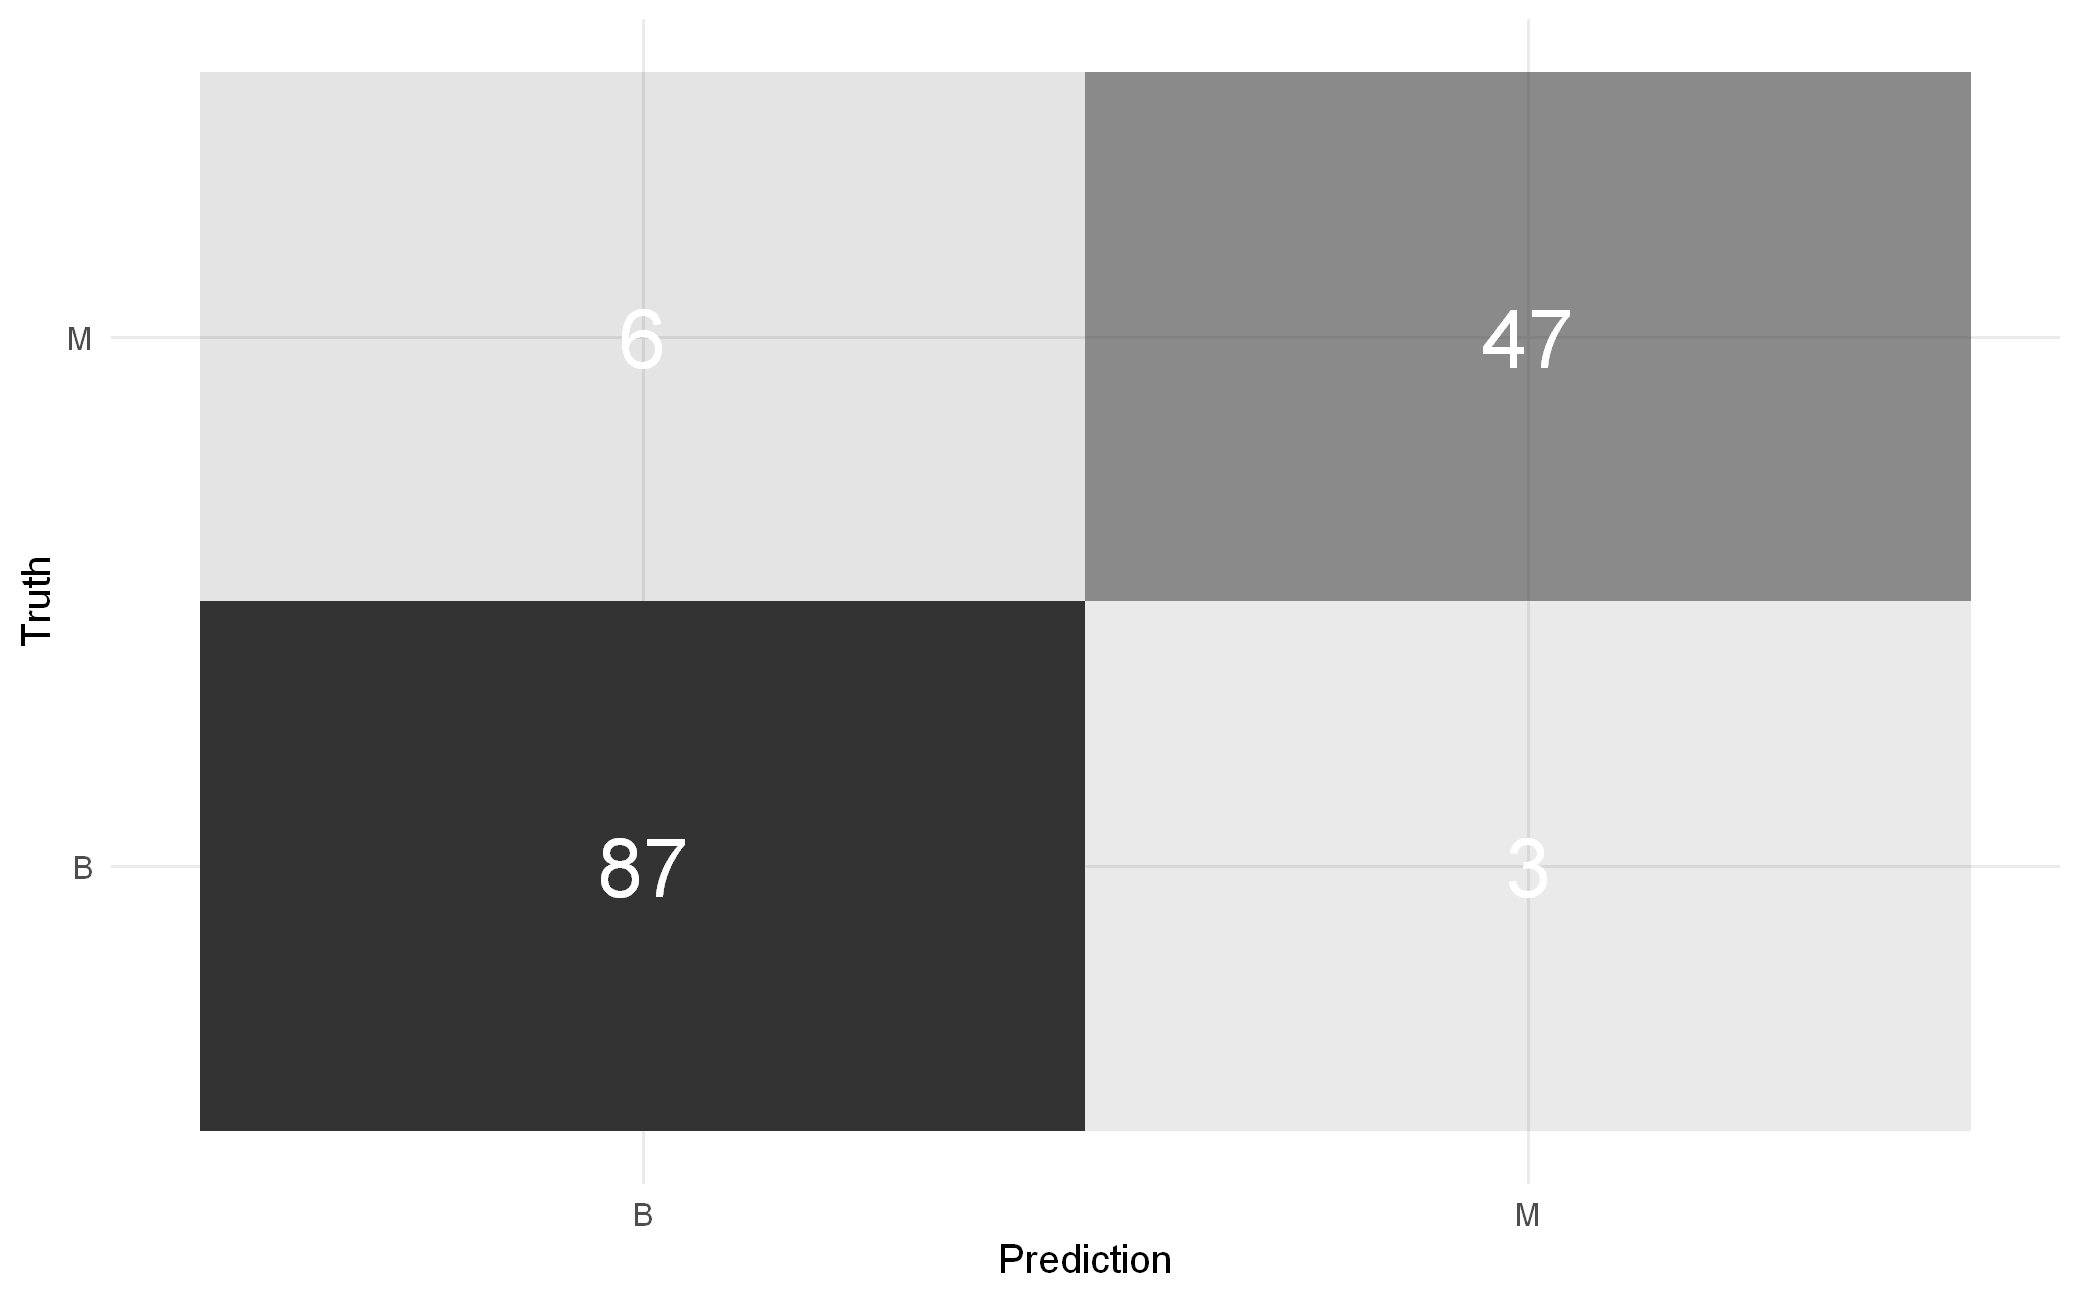

In [32]:
conf_knn <- model_knn %>% 
    predict(model_testing) %>%
    bind_cols(model_testing %>% select(diagnosis)) %>%
    conf_mat(diagnosis, .pred_class)

conf_knn %>%
    pluck(1) %>%
    as_tibble() %>%
    ggplot(aes(Prediction, Truth, alpha = n)) +
    geom_tile(show.legend = FALSE) +
    geom_text(aes(label = n), colour = "white", alpha = 1, size = 8) + 
    theme_minimal()